In [1]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Importing required libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

**Linear Regression**

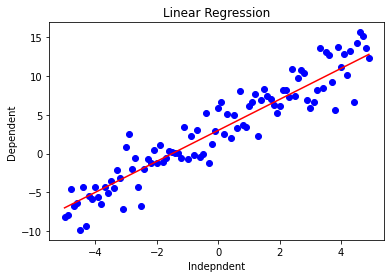

In [13]:
# function: 2x + 3

x = np.arange(-5.0, 5.0, 0.1)  # size: 100
y = 2 * x + 3

y_noise = 2 * np.random.normal(size = x.size)
ydata = y + y_noise
plt.plot(x, ydata, "bo")
plt.plot(x, y, "r")
plt.title("Linear Regression")
plt.ylabel("Dependent")
plt.xlabel("Indepndent")
plt.show()

**Cubic Function**

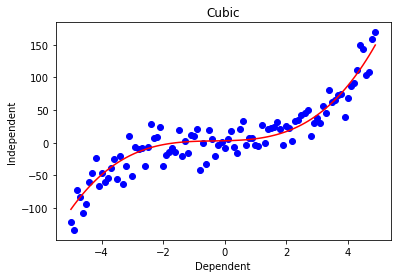

In [23]:
# function: ax^3 + bx^2 + cx + d

x = np.arange(-5.0, 5.0, 0.1)
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size = x.size)
ydata = y + y_noise
plt.plot(x, ydata, "bo")
plt.plot(x, y, "r")
plt.title("Cubic")
plt.xlabel("Dependent")
plt.ylabel("Independent")
plt.show()

**Quadratic**

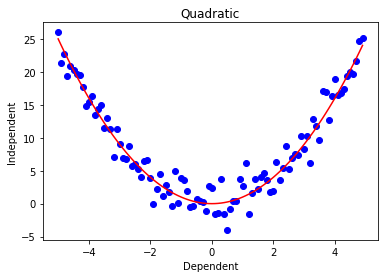

In [28]:
# function: Y = X^2

x = np.arange(-5, 5, 0.1)
y = np.power(x, 2)
y_noise = 2 * np.random.normal(size = x.size)
ydata = y + y_noise
plt.plot(x, ydata, "bo")
plt.plot(x, y, "r")
plt.title("Quadratic")
plt.xlabel("Dependent")
plt.ylabel("Independent")
plt.show()

**Exponential**

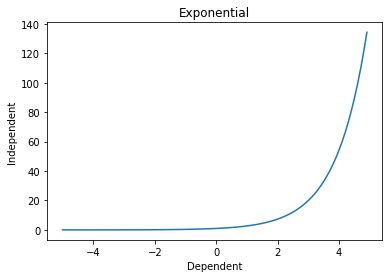

In [30]:
# function: Y = a + bc^x
X = np.arange(-5, 5, 0.1)
Y = np.exp(X)
plt.plot(X, Y)
plt.title("Exponential")
plt.ylabel("Independent")
plt.xlabel("Dependent")
plt.show()

**Logarithmic**

<ipython-input-31-64c621fa2982>:2: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


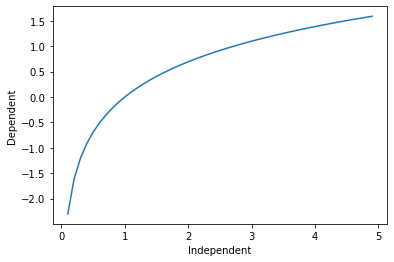

In [31]:
X = np.arange(-5, 5, 0.1)
Y = np.log(X)
plt.plot(X, Y)
plt.ylabel("Dependent")
plt.xlabel("Independent")
plt.show()

### Non-Linear Regression Example

In [34]:
df = pd.read_csv("china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


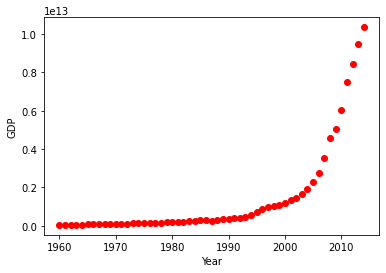

In [38]:
plt.plot(df["Year"], df["Value"], "ro")
plt.ylabel("GDP")
plt.xlabel("Year")
plt.show()

### Choosing a Model

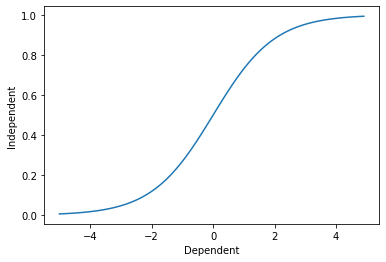

In [40]:
X = np.arange(-5, 5, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))
plt.plot(X, Y)
plt.xlabel("Dependent")
plt.ylabel("Independent")
plt.show()

### Building The Model

In [47]:
# Logistic Function
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1 * (x - Beta_2)))
    return y

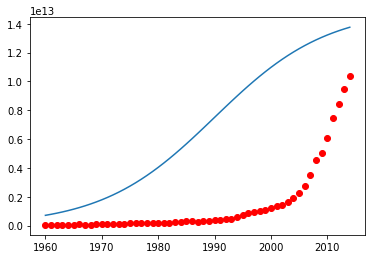

In [52]:
beta_1 = 0.10
beta_2 = 1990.0

# Logistic function
x = df["Year"]
y = df["Value"]
Y_pred = sigmoid(x, beta_1, beta_2)
plt.plot(x, Y_pred*15000000000000.)
plt.plot(x, y, "ro")
plt.show()

In [53]:
# Normalization

xdata = x / max(x)
ydata = y / max(y)

In [54]:
# How we find the best parameters for our fit line?
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


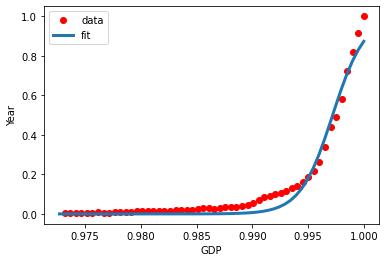

In [57]:
# Now we plot our resulting regression model.
x = np.linspace(1960, 2015, 55)
x = x / max(x)

y = sigmoid(x, *popt)
plt.plot(xdata, ydata, "ro", label = "data")
plt.plot(x, y, linewidth = 3.0, label = "fit")
plt.legend(loc = "best")
plt.xlabel("GDP")
plt.ylabel("Year")
plt.show()

In [76]:
# Evaluation
xdata = x / max(x)
ydata = y / max(y)

x_train, x_test, y_train, y_test = train_test_split(xdata, ydata, test_size = 0.2, random_state = 0)

popt, pcov = curve_fit(sigmoid, x_train, y_train)
yhat = sigmoid(x_test, *popt)
print(r2_score(yhat,  y_test))

0.9929864033650881
